<a href="https://colab.research.google.com/github/rajdeepmondal1/FireSnapCookies/blob/main/Fall_2022_Data_Science_Intern_Challenge_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fall 2022 Data Science Intern Challenge 

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


## Question 1: Given some sample data, write a program to answer the following: click here to access the [required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?

I will answer all three questions at the end of this analysis.

# Let's Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Data

In [2]:
df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

As mentioned in the question, there are 100 unique sneaker shops

In [5]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We can see that the maximum `order_amount` is 704000, but the median `order_amount` is 284. So something might be wrong here, which we will probe firther.

In [6]:
df['order_amount'].max()

704000

In [7]:
df['total_items'].max()

2000

## Let's make a new feature containing the price of each item.

In [8]:
df['price_per_item'] = df['order_amount'] / df['total_items']

In [9]:
df['price_per_item'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price_per_item, dtype: float64

Something here seems off too, as the median price is 153 but the maximum price is 25725, that too for a sneaker. This is starting to look suspicious.

In the meantime we will convert our `created_at` into a datetime field.

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'])

We will extract the date feature from the `created_at` field.

In [11]:
df['created_at_date'] = df['created_at'].dt.date

In [12]:
df['created_at_date'].value_counts()

2017-03-09    199
2017-03-17    198
2017-03-07    196
2017-03-02    182
2017-03-01    182
2017-03-21    179
2017-03-28    175
2017-03-26    175
2017-03-22    175
2017-03-18    173
2017-03-27    170
2017-03-25    170
2017-03-10    167
2017-03-30    167
2017-03-11    167
2017-03-29    165
2017-03-04    165
2017-03-05    163
2017-03-03    162
2017-03-13    159
2017-03-12    159
2017-03-20    158
2017-03-08    156
2017-03-24    155
2017-03-23    152
2017-03-19    149
2017-03-06    148
2017-03-14    148
2017-03-16    143
2017-03-15    143
Name: created_at_date, dtype: int64

In [37]:
df['created_at_date'].value_counts().min(), df['created_at_date'].value_counts().max()

(138, 197)

Number of purchases each day ranges from 138 to 197, which seems ok. 

Now lets see if there are any null or duplicate values in our data.

In [13]:
df['created_at_date'].nunique()

30

In [14]:
df.isnull().sum()

order_id           0
shop_id            0
user_id            0
order_amount       0
total_items        0
payment_method     0
created_at         0
price_per_item     0
created_at_date    0
dtype: int64

In [15]:
df.duplicated().sum()

0

## Let's now group our data by `shop_id` and select the `order_amount` and `total_items` and taking its sum, then calculating `average_order_value`.

In [16]:
data_by_shop_id = pd.DataFrame(df.groupby('shop_id')[['order_amount', 'total_items']].sum())
data_by_shop_id['average_order_value'] = data_by_shop_id['order_amount'] / data_by_shop_id['total_items']
data_by_shop_id

,order_amount,total_items,average_order_value
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


## Let's now group our data by `user_id` and select the `order_amount` and `total_items` and taking its sum, then calculating `average_order_value`.

In [17]:
data_by_user_id = pd.DataFrame(df.groupby('user_id')[['order_amount', 'total_items']].sum())
data_by_user_id['average_order_value'] = data_by_user_id['order_amount'] / data_by_user_id['total_items']
data_by_user_id

,order_amount,total_items,average_order_value
user_id,,,
607,11968000,34000,352.000000
700,4790,30,159.666667
701,5162,34,151.823529
702,5286,34,155.470588
703,6091,41,148.560976
...,...,...,...
995,5316,35,151.885714
996,5312,37,143.567568
997,29236,24,1218.166667


## Let's make a box plot to see the distribution of `order_amount`, `total_items`, and `price_per_item`, checking for outlier values.

In [18]:
import seaborn as sns

In [19]:
def box_plot(data):
    import plotly.express as px
    for i in data.select_dtypes(include='number').columns: 
      fig = px.box(data, y = i, width=500, height=500,title = "The Boxplot for " + i,template="plotly_dark")
      fig.show()

In [20]:
box_plot(df[['order_amount', 'total_items', 'price_per_item']])

Distribution of numerical features


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



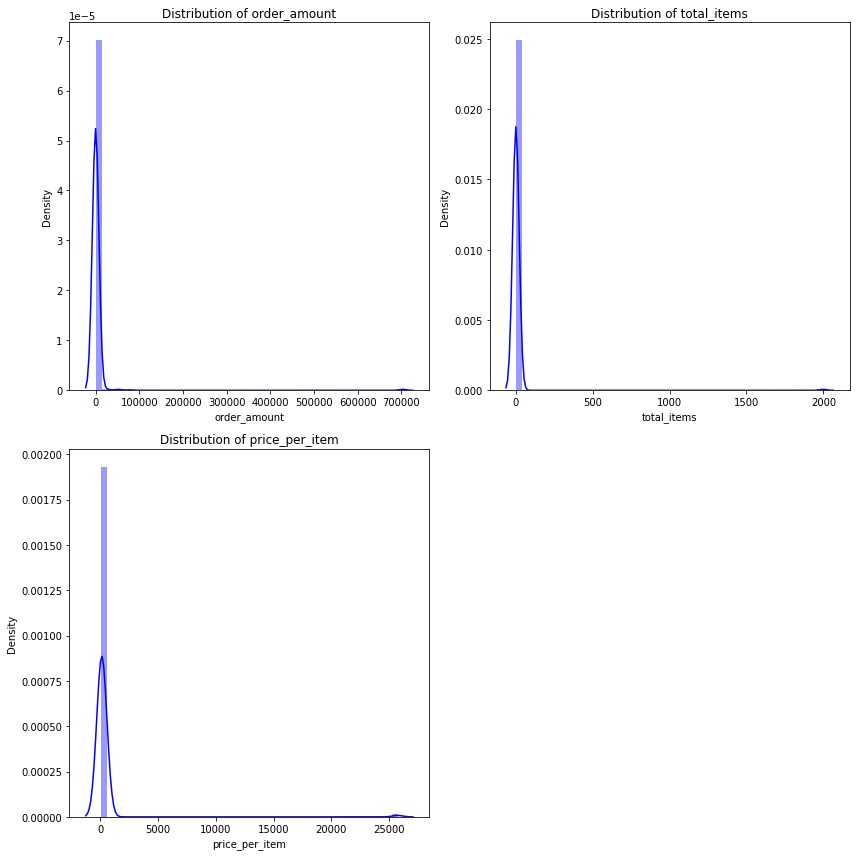

In [22]:
print('Distribution of numerical features')
plt.figure(figsize=(12, 12))
for i, col in enumerate(['order_amount', 'total_items', 'price_per_item']):
    # Plot distribution 
    plt.subplot(2, 2, i+1) 
    sns.distplot(df[col], color='blue')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

## All `order_amount`, `total_items`, and `price_per_item` has crazy outliers, let's handle those now.

Let's look at some `order_amount` data where the  values are 3 standard deviations from the mean.

In [23]:
std3 = df['order_amount'].std() * 3
mean = df['order_amount'].mean()
outliers = std3 + mean
df[df['order_amount'] > outliers]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item,created_at_date
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0,2017-03-07
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0,2017-03-04
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0,2017-03-02
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0,2017-03-27
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0,2017-03-24
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0,2017-03-15
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0,2017-03-11
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0,2017-03-19
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0,2017-03-17
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0,2017-03-12


We can see that all the items are from `shop_id` = 42 except for 1 with `shop_id` 78.

Price per Sneaker is $352, which seems to be an high end shoe.

What's suspicious is that all these orders are made by `user_id` 607 and has bought exactly 704000 items, and purchased at 4am every few days. This seems like a bot activity. Let's explore further.

Let's now look at some `price_per_item` data where the  values are 3 standard deviations from the mean.

In [25]:
std3 = df['price_per_item'].std() * 3
mean = df['price_per_item'].mean()
outliers = std3 + mean
df[df['price_per_item'] > outliers]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item,created_at_date
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725.0,2017-03-12
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0,2017-03-26
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0,2017-03-16
511,512,78,967,51450,2,cash,2017-03-09 07:23:14,25725.0,2017-03-09
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0,2017-03-18
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0,2017-03-27
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0,2017-03-15
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0,2017-03-16
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0,2017-03-17
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20,25725.0,2017-03-27


We see something really weird here, `shop_id` 78 has listed `price_per_item` to be $25,725, which is impossible for a sneaker. There is something wrong with `shop_id` 78. We will eleminate dara for `shop_id` 78. Let's explore further.

In [27]:
df[df['shop_id'] == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item,created_at_date
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0,2017-03-07
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0,2017-03-24
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0,2017-03-04
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0,2017-03-11
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0,2017-03-04
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0,2017-03-02
834,835,42,792,352,1,cash,2017-03-25 21:31:25,352.0,2017-03-25
835,836,42,819,704,2,cash,2017-03-09 14:15:15,352.0,2017-03-09
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,352.0,2017-03-13
979,980,42,744,352,1,debit,2017-03-12 13:09:04,352.0,2017-03-12


In [28]:
df[df['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item,created_at_date
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0,2017-03-07
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0,2017-03-04
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0,2017-03-02
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0,2017-03-24
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0,2017-03-15
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0,2017-03-11
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0,2017-03-19
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0,2017-03-17
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0,2017-03-12
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0,2017-03-07


Although `shop_id` 42 sells item for $352 which is reasonable for a high end sneaker, but the user behavior of `user_id` 607 seems really suspicious as they buy 704,000 items at exactly the same time, 4AM. We will forward this information to our fraud department and for current analysis remove these data.

Let's remove data with `shop_id` 78 and data with `user_id` 607.

In [29]:
df = df[(df['shop_id'] != 78) & (df['user_id'] != 607)]

Now, let's check the distribution of our data - 

Distribution of numerical features


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



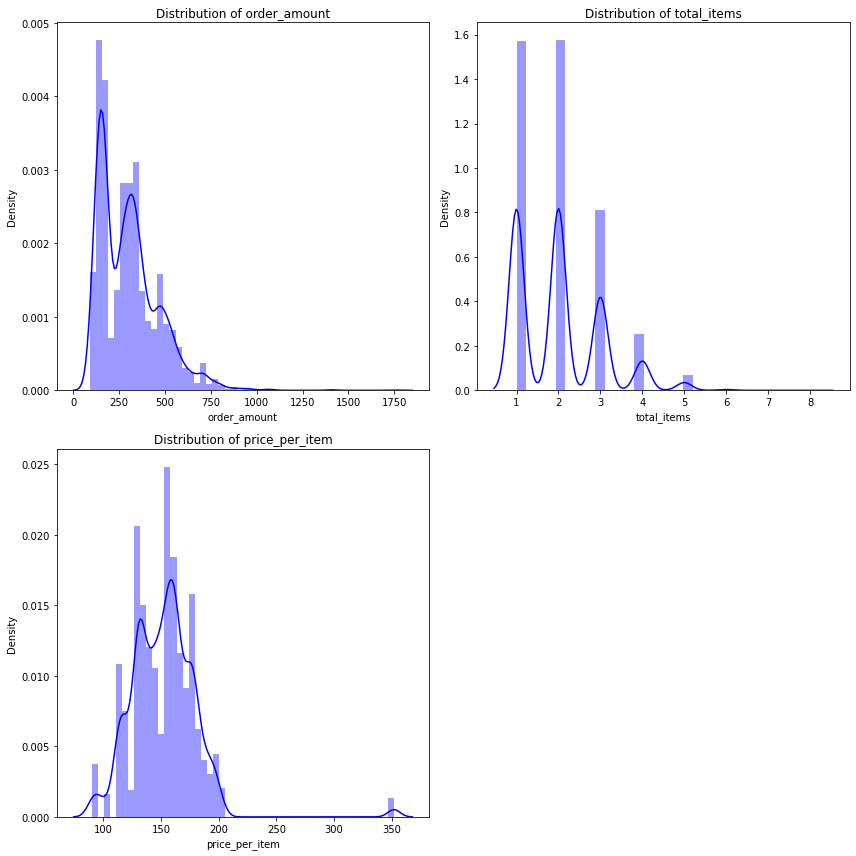

In [31]:
print('Distribution of numerical features')
plt.figure(figsize=(12, 12))
for i, col in enumerate(['order_amount', 'total_items', 'price_per_item']):
    # Plot distribution 
    plt.subplot(2, 2, i+1) 
    sns.distplot(df[col], color='blue')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

AHHH, the distribution seems quite better now.

In [32]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [39]:
df['price_per_item'].mode()[0]

153.0

From the description we can see that - 
1. Maximum price per item for a sneaker is `$352.00` 
2. Median price per item is `$153.00` 
3. Mean price per item is `$151.79`
4. Mode price per item is `$153.00`

### 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
In the naive calculation of Average order value or Price per item was done by getting the mean of the entire data without taking in considerations about Outliers and Fraud. Moreover considering median and mode gives a better estimate about the average order value than mean, and mean is very sensative to outliers. 

In this problem I have cleaned the data of outliers by removing `shop_id` 78 and `user_id` 607. Then we get 
1. Maximum price per item for a sneaker is `$352.00` 
2. Median price per item is `$153.00` 
3. Mean price per item is `$151.79`
4. Mode price per item is `$153.00`

### 2. What metric would you report for this dataset?
**Median** and **Mode** are better metrics to report as they are less sensative to outliers than Mean values. Median represents the middle value for a group of data and Mode is the value that is repeatedly occurring in a given set.

### 3. What is its value?
Both **Median** and **Mode** values are `$153.00`.

## Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?

In [33]:
# SELECT count(*)
# FROM orders
# JOIN shippers
# ON orders.shipperid = shippers.shipperid
# WHERE shippers.ShipperName = "Speedy Express";

In [34]:
# SELECT lastname, count(OrderID)
# FROM employees
# JOIN orders
# ON employees.employeeID = orders.employeeID
# GROUP BY employees.employeeID
# ORDER BY count(OrderID) DESC
# LIMIT 1;

In [35]:
# SELECT p.ProductName 
# FROM OrderDetails d
# JOIN Orders o
# ON d.OrderID = o.OrderID
# JOIN Customers c
# ON o.CustomerID = c.CustomerID
# JOIN Products p
# ON p.ProductID = d.ProductID
# WHERE c.country = "Germany"
# GROUP BY p.productID
# ORDER BY sum(quantity) DESC
# LIMIT 1;